<a href="https://colab.research.google.com/github/rubanzasilva/tabularPlaygroundSeptember/blob/test/tabularPlaygroundSeptember.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
import seaborn as sns
from pathlib import Path
import PIL
import json
from pathlib import Path

from fastai.tabular.all import *

In [2]:
!ls drive/MyDrive/Rubanza/kaggle/

models					test_clean   train.csv
sample_submission.csv			test.csv
tabular-playground-series-sep-2022.zip	train_clean


In [3]:
# Next, install the Kaggle API client.
!pip install -q kaggle
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rubanzasilva","key":"3b658548b1e0c42c5319145f1b068a86"}'}

In [4]:
 ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

# List available datasets.
#!kaggle datasets list

In [5]:
path = Path('drive/MyDrive/Rubanza/kaggle/')
path

Path('drive/MyDrive/Rubanza/kaggle')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
train_df = pd.read_csv(path/'train.csv') 
test_df = pd.read_csv(path/'test.csv')
sample = pd.read_csv(path/'sample_submission.csv')
train_df.head()

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [8]:
test_df

,row_id,date,country,store,product
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques
...,...,...,...,...,...
17515,87643,2021-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose
17516,87644,2021-12-31,Spain,KaggleRama,Kaggle Advanced Techniques
17517,87645,2021-12-31,Spain,KaggleRama,Kaggle Getting Started
17518,87646,2021-12-31,Spain,KaggleRama,Kaggle Recipe Book


In [9]:
train_df = add_datepart(train_df, 'date')
test_df = add_datepart(test_df, 'date')

In [10]:
train_df.drop(columns=[ 'Is_quarter_end','Is_month_end','Is_month_start','Is_year_end','Is_year_start','Dayofyear','Day','Is_quarter_start'],axis=1, inplace=True)

In [11]:
train_df

,row_id,country,store,product,num_sold,Year,Month,Week,Dayofweek,Elapsed
0,0,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017,1,52,6,1.483229e+09
1,1,Belgium,KaggleMart,Kaggle Getting Started,615,2017,1,52,6,1.483229e+09
2,2,Belgium,KaggleMart,Kaggle Recipe Book,480,2017,1,52,6,1.483229e+09
3,3,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017,1,52,6,1.483229e+09
4,4,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017,1,52,6,1.483229e+09
...,...,...,...,...,...,...,...,...,...,...
70123,70123,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614,2020,12,53,3,1.609373e+09
70124,70124,Spain,KaggleRama,Kaggle Advanced Techniques,215,2020,12,53,3,1.609373e+09
70125,70125,Spain,KaggleRama,Kaggle Getting Started,158,2020,12,53,3,1.609373e+09
70126,70126,Spain,KaggleRama,Kaggle Recipe Book,135,2020,12,53,3,1.609373e+09


In [12]:
# del train_clean_df[ 'Is_quarter_end,Is_month_end,Is_month_start']

In [13]:
# cont,cat = cont_cat_split(train_df, dep_var="num_sold")

In [14]:
# train_clean_df.to_csv(path/'train_clean.csv')
# test_clean_df.to_csv(path/'test_clean.csv')

In [15]:
# train_df.to_pickle(path/'train_clean')
# test_df.to_pickle(path/'test_clean')

In [16]:
# train_clean_df = pd.read_csv(path/'train_clean.csv') 
# test_clean_df = pd.read_csv(path/'test_clean.csv')

In [17]:
# train_clean_df = pd.read_pickle(path/'train_clean')
# test_clean_df = pd.read_pickle(path/'train_clean')

In [18]:
# cont_names, cat_names = cont_cat_split(train_df, max_card=0)

In [19]:
# cont_names

In [20]:
# cat_names

#EDA

In [21]:
shape = train_df.shape
shape

(70128, 10)

In [22]:
train_df.size

701280

In [23]:
# To get unique values in 1 series/column
print(f"Unique FN: {train_df['row_id'].nunique()}")

Unique FN: 70128


In [24]:
dls = TabularDataLoaders.from_df(train_df, path=path, y_names="num_sold",
    cat_names = ['country','store','product','Year','Month','Week','Dayofweek','Elapsed'],
    cont_names = ['row_id'],
    procs = [Categorify, FillMissing, Normalize])

In [25]:
# dls = TabularDataLoaders.from_csv(path/'train_clean.csv', path=path, y_names="num_sold",
#     cat_names = ['country','store','product','Is_month_end','Is_month_start','Is_quarter_end','Is_quarter_start','Is_year_end','Is_year_start'],
#     cont_names = ['row_id','Year','Month','Week','Day','Dayofweek','Dayofyear','Elapsed'],
#     procs = [Categorify, FillMissing, Normalize])

In [26]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))

In [27]:
to = TabularPandas(train_df, procs=[Categorify, FillMissing,Normalize],
                   cat_names = ['country','store','product','Year','Month','Week','Dayofweek','Elapsed'],
                   cont_names = ['row_id'],
                   y_names='num_sold',
                   splits=splits)

In [28]:
to.xs.iloc[:2]

,country,store,product,Year,Month,Week,Dayofweek,Elapsed,row_id
65919,2,2,4,4,10,41,1,1374,1.525297
59120,5,1,1,4,5,20,6,1232,1.189234


In [29]:
dls = to.dataloaders(bs=64)

In [30]:
dls.show_batch()

,country,store,product,Year,Month,Week,Dayofweek,Elapsed,row_id,num_sold
0,France,KaggleMart,Kaggle Recipe Book,2020,6,23,0,1590969600.0,59865.999237,187.0
1,France,KaggleRama,Kaggle for Kids: One Smart Goose,2018,10,41,5,1539388800.0,31214.999964,160.0
2,France,KaggleMart,Kaggle for Kids: One Smart Goose,2020,8,34,6,1598140800.0,63851.000551,490.0
3,Germany,KaggleMart,Kaggle Getting Started,2018,2,8,2,1519171200.0,19984.999785,292.0
4,France,KaggleRama,Kaggle Advanced Techniques,2019,10,40,1,1569888000.0,48156.000088,87.0
5,Belgium,KaggleRama,Kaggle Recipe Book,2020,4,18,1,1588032000.0,58230.000301,50.0
6,Italy,KaggleRama,Kaggle Recipe Book,2018,1,2,4,1515715200.0,18077.999681,81.0
7,Poland,KaggleRama,Kaggle for Kids: One Smart Goose,2020,12,51,2,1608076800.0,69398.999201,135.0
8,Belgium,KaggleMart,Kaggle Getting Started,2020,10,41,3,1602115200.0,66049.000147,341.0
9,France,KaggleMart,Kaggle Advanced Techniques,2018,6,26,3,1530144000.0,26071.999937,375.0


In [31]:
learn = tabular_learner(dls, metrics=mae)

SuggestedLRs(valley=0.0831763744354248)

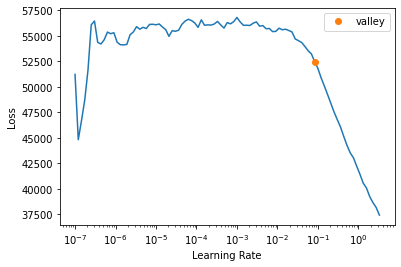

In [32]:
learn.lr_find()

In [33]:
learn.fit_one_cycle(15, 1e-2,wd=0.2)

epoch,train_loss,valid_loss,mae,time
0,19201.562500,17715.408203,128.921341,00:08
1,908.216309,508.677246,16.691904,00:08
2,796.522827,422.241211,15.086311,00:09
3,724.576477,415.682251,13.860647,00:08
4,772.517273,647.139038,18.200623,00:08
5,873.127014,1641.530518,25.861687,00:08
6,782.335938,454.813934,15.206605,00:08
7,739.510254,483.075745,14.421325,00:08
8,697.066223,570.965393,13.802708,00:09
9,613.723328,290.324615,11.925102,00:08


In [34]:
learn.show_results()

,country,store,product,Year,Month,Week,Dayofweek,Elapsed,row_id,num_sold,num_sold_pred
0,2.0,1.0,4.0,2.0,9.0,38.0,4.0,628.0,-0.244830,379.0,386.073242
1,6.0,2.0,4.0,4.0,11.0,48.0,1.0,1423.0,1.643134,131.0,137.625641
2,5.0,2.0,1.0,3.0,7.0,29.0,1.0,926.0,0.463428,40.0,44.638157
3,6.0,1.0,4.0,3.0,10.0,43.0,2.0,1025.0,0.698658,251.0,266.559082
4,6.0,2.0,4.0,4.0,5.0,20.0,5.0,1231.0,1.187603,109.0,122.171753
5,4.0,1.0,2.0,2.0,11.0,45.0,5.0,678.0,-0.125510,269.0,269.913452
6,4.0,1.0,3.0,4.0,5.0,20.0,7.0,1233.0,1.191310,188.0,190.334351
7,3.0,1.0,1.0,2.0,4.0,16.0,4.0,474.0,-0.609957,487.0,497.206787
8,2.0,1.0,2.0,4.0,12.0,51.0,1.0,1444.0,1.691079,311.0,316.031647


test set

run model on 
test set

In [81]:
dl = learn.dls.test_dl(test_df)
preds = learn.get_preds()[0]
preds

tensor([[117.3818],
        [442.1633],
        [325.6987],
        ...,
        [346.8273],
        [303.8806],
        [115.1115]])

Feature importance

In [36]:
class PermutationImportance():
  "Calculate and plot the permutation importance"
  def __init__(self, learn:Learner, df=None, bs=None):
    "Initialize with a test dataframe, a learner, and a metric"
    self.learn = learn
    self.df = df if df is not None else None
    bs = bs if bs is not None else learn.dls.bs
    self.dl = learn.dls.test_dl(self.df, bs=bs) if self.df is not None else learn.dls[1]
    self.x_names = learn.dls.x_names.filter(lambda x: '_na' not in x)
    self.na = learn.dls.x_names.filter(lambda x: '_na' in x)
    self.y = dls.y_names
    self.results = self.calc_feat_importance()
    self.plot_importance(self.ord_dic_to_df(self.results))

  def measure_col(self, name:str):
    "Measures change after column shuffle"
    col = [name]
    if f'{name}_na' in self.na: col.append(name)
    orig = self.dl.items[col].values
    perm = np.random.permutation(len(orig))
    self.dl.items[col] = self.dl.items[col].values[perm]
    metric = learn.validate(dl=self.dl)[1]
    self.dl.items[col] = orig
    return metric

  def calc_feat_importance(self):
    "Calculates permutation importance by shuffling a column on a percentage scale"
    print('Getting base error')
    base_error = self.learn.validate(dl=self.dl)[1]
    self.importance = {}
    pbar = progress_bar(self.x_names)
    print('Calculating Permutation Importance')
    for col in pbar:
      self.importance[col] = self.measure_col(col)
    for key, value in self.importance.items():
      self.importance[key] = (base_error-value)/base_error #this can be adjusted
    return OrderedDict(sorted(self.importance.items(), key=lambda kv: kv[1], reverse=True))

  def ord_dic_to_df(self, dict:OrderedDict):
    return pd.DataFrame([[k, v] for k, v in dict.items()], columns=['feature', 'importance'])

  def plot_importance(self, df:pd.DataFrame, limit=20, asc=False, **kwargs):
    "Plot importance with an optional limit to how many variables shown"
    df_copy = df.copy()
    df_copy['feature'] = df_copy['feature'].str.slice(0,25)
    df_copy = df_copy.sort_values(by='importance', ascending=asc)[:limit].sort_values(by='importance', ascending=not(asc))
    ax = df_copy.plot.barh(x='feature', y='importance', sort_columns=True, **kwargs)
    for p in ax.patches:
      ax.annotate(f'{p.get_width():.4f}', ((p.get_width() * 1.005), p.get_y()  * 1.005))

Getting base error


Calculating Permutation Importance


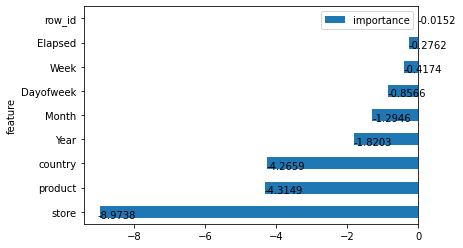

In [37]:
imp = PermutationImportance(learn)

#Notes
-drop row id variable

In [ ]:
train_clean_df.drop(columns=[ 'Is_quarter_end','Is_month_end','Is_month_start','Is_year_end','Is_year_start'])

In [ ]:
train_clean_df

,Unnamed: 0,row_id,country,store,product,num_sold,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,0,0,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017,1,52,1,6,1,False,True,False,True,False,True,1.483229e+09
1,1,1,Belgium,KaggleMart,Kaggle Getting Started,615,2017,1,52,1,6,1,False,True,False,True,False,True,1.483229e+09
2,2,2,Belgium,KaggleMart,Kaggle Recipe Book,480,2017,1,52,1,6,1,False,True,False,True,False,True,1.483229e+09
3,3,3,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017,1,52,1,6,1,False,True,False,True,False,True,1.483229e+09
4,4,4,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017,1,52,1,6,1,False,True,False,True,False,True,1.483229e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70123,70123,70123,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614,2020,12,53,31,3,366,True,False,True,False,True,False,1.609373e+09
70124,70124,70124,Spain,KaggleRama,Kaggle Advanced Techniques,215,2020,12,53,31,3,366,True,False,True,False,True,False,1.609373e+09
70125,70125,70125,Spain,KaggleRama,Kaggle Getting Started,158,2020,12,53,31,3,366,True,False,True,False,True,False,1.609373e+09
70126,70126,70126,Spain,KaggleRama,Kaggle Recipe Book,135,2020,12,53,31,3,366,True,False,True,False,True,False,1.609373e+09


In [ ]:
train_df.to_csv(path/'train_clean_b.csv')
test_df.to_csv(path/'test_clean_b.csv')

#XGBOOST

In [38]:
import xgboost as xgb

In [82]:
X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

In [83]:
to.train.ys, to.train.ys.values.ravel()

(       num_sold
 65919       133
 59120       419
 57692       120
 11964        90
 43798        68
 ...         ...
 23840       154
 12027       280
 54650       244
 42252       146
 14441       248
 
 [56103 rows x 1 columns],
 array([133, 419, 120, ..., 244, 146, 248], dtype=int16))

In [84]:
model = xgb.XGBClassifier(n_estimators = 2, max_depth=8, learning_rate=1e-2, subsample=0.5)

In [85]:
xgb_model = model.fit(X_train, y_train)

In [86]:
xgb_preds = xgb_model.predict_proba(X_test)

In [87]:
xgb_preds

array([[0.0014623 , 0.00146214, 0.00146284, ..., 0.00146211, 0.00146212,
        0.00146212],
       [0.00146112, 0.00146096, 0.00146166, ..., 0.00146094, 0.00146094,
        0.00146094],
       [0.00146199, 0.00146183, 0.00146301, ..., 0.0014618 , 0.0014618 ,
        0.0014618 ],
       ...,
       [0.00146216, 0.001462  , 0.0014627 , ..., 0.00146198, 0.00146198,
        0.00146198],
       [0.00146594, 0.00146578, 0.00146648, ..., 0.00146575, 0.00146575,
        0.00146575],
       [0.00145929, 0.00145913, 0.00146045, ..., 0.0014591 , 0.00146672,
        0.00146696]], dtype=float32)

Accuracy test

In [45]:
accuracy(tensor(xgb_preds), tensor(y_test))

TensorBase(0.0071)

feature importance

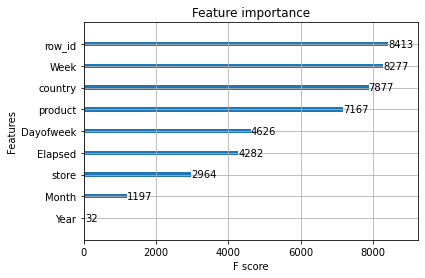

In [46]:
from xgboost import plot_importance
plot_importance(xgb_model)

# Ensembling

In [49]:
preds

(tensor([[518.1588],
         [378.0846],
         [325.1266],
         ...,
         [105.1991],
         [ 88.7820],
         [142.7891]]), None)

In [50]:
xgb_preds

array([[0.00144558, 0.00144511, 0.00144644, ..., 0.00144504, 0.00144504,
        0.00144504],
       [0.00144611, 0.00144563, 0.00144697, ..., 0.00144556, 0.00144556,
        0.00144556],
       [0.00144624, 0.00144576, 0.00145136, ..., 0.00144569, 0.0014457 ,
        0.0014457 ],
       ...,
       [0.00144639, 0.00144591, 0.00144725, ..., 0.00144584, 0.00144585,
        0.00144585],
       [0.0014561 , 0.00145562, 0.00145696, ..., 0.00145555, 0.00145555,
        0.00145555],
       [0.00143862, 0.00143815, 0.00144094, ..., 0.0014456 , 0.00146079,
        0.00145336]], dtype=float32)

In [88]:
avgs = (preds + xgb_preds) 

In [89]:
avgs = (preds + xgb_preds) / 2
avgs

tensor([[ 58.6916,  58.6916,  58.6916,  ...,  58.6916,  58.6916,  58.6916],
        [221.0824, 221.0824, 221.0824,  ..., 221.0824, 221.0824, 221.0824],
        [162.8501, 162.8501, 162.8501,  ..., 162.8501, 162.8501, 162.8501],
        ...,
        [173.4144, 173.4144, 173.4144,  ..., 173.4144, 173.4144, 173.4144],
        [151.9410, 151.9410, 151.9410,  ..., 151.9410, 151.9410, 151.9410],
        [ 57.5565,  57.5565,  57.5565,  ...,  57.5565,  57.5565,  57.5565]])

In [ ]:
argmax = avgs.argmax(dim=1)
argmax

Grade predictions

In [ ]:
y_test

array([292,  82, 111, ..., 145, 112, 101], dtype=int16)

In [ ]:
accuracy(tensor(preds), tensor(y_test))

In [79]:
accuracy(tensor(xgb_preds), tensor(y_test))

TensorBase(0.0078)

In [ ]:
accuracy(tensor(avgs), tensor(y_test))

#Random forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
tree = RandomForestClassifier(n_estimators=2)

In [62]:
tree.fit(X_train, y_train);

importance

In [ ]:
!pip install rfpimp

In [67]:

from rfpimp import *

In [68]:
imp = importances(tree, X_test, to.valid.ys)

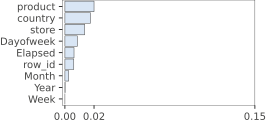

In [69]:
plot_importances(imp)

In [70]:
forest_preds = tree.predict_proba(X_test)

In [71]:
forest_preds

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

add to ensemble

In [77]:
avgs = ( xgb_preds + forest_preds) /2

In [91]:
accuracy(tensor(avgs), tensor(y_test))

TensorBase(0.0062)

# Submission

In [ ]:
# sample['num_sold'] = preds[0]

In [ ]:
# sample.to_csv('submission.csv', index=False)

In [ ]:
test_df = pd.read_csv(path/'test.csv')

In [ ]:
target_preds = preds[0]

test_df['num_sold'] = target_preds

test_df.to_csv('submission.csv', columns=['row_id','num_sold'], index=False)

sub = pd.read_csv('submission.csv')
sub.head()

,row_id,num_sold
0,70128,551.22974
1,70129,425.32135
2,70130,351.41385
3,70131,609.92050
4,70132,187.82668


In [ ]:
!kaggle competitions submit -c tabular-playground-series-sep-2022 -f submission.csv -m "Original dataset with date and without rowid fetaures "

100% 268k/268k [00:04<00:00, 55.4kB/s]
Successfully submitted to Tabular Playground Series - Sep 2022